<a href="https://colab.research.google.com/github/ehpub/statistics_python/blob/main/%ED%86%B5%EA%B3%84_with_python_t_%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/t-%eb%b6%84%ed%8f%ac-%ed%8c%8c%ec%9d%b4%ec%8d%ac%ec%9c%bc%eb%a1%9c-%eb%8b%a4%eb%a3%a8%eb%8a%94-%ed%86%b5%ea%b3%84/)

In [8]:
import scipy as sp
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## t 분포

t분포는 모집단의 표준편차를 구하기 어려울 때 표본의 표준편차를 사용하여 표준화를 시도하는 분포를 말합니다.

- t분포 평균과 표준편차 구하기

다음은 A 학교 10명 학생의 키이다.(단위는 cm)

173,180,179,165,172,167,175,177,172,180

모집단의 평균 키와 표편차를 예측하시오.

In [47]:
data = np.array([173,180,179,165,172,167,175,177,172,180])
print("평균:",data.mean())
print("표준편차:",data.std(ddof=1))

평균: 174.0
표준편차: 5.228129047119374


In [48]:
data.std() #자유도를 적용하지 않았을 때

4.959838707054898

- t 분포를 따르는 샘플 생성하기

In [25]:
height_t_sample =  t.rvs(size=10,loc=174,scale=7,df=99)
print(height_t_sample)

[179.42431315 168.03551913 181.73255413 171.7837546  174.17083326
 168.86622021 177.07276136 184.30734496 158.77872558 174.50717195]


- t분포 샘플과 정규분포 샘플 생성 데이터를 비교하기

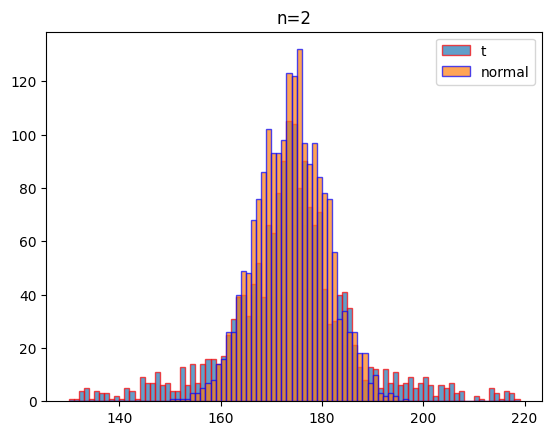

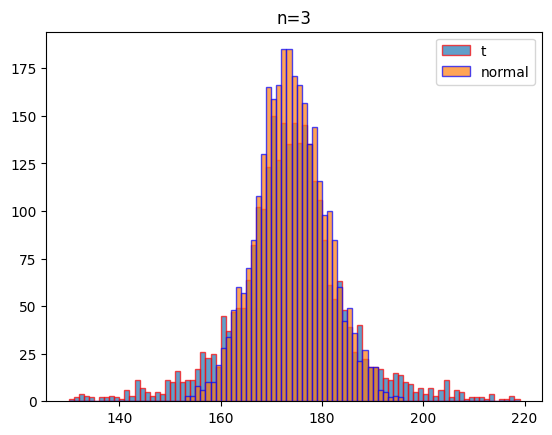

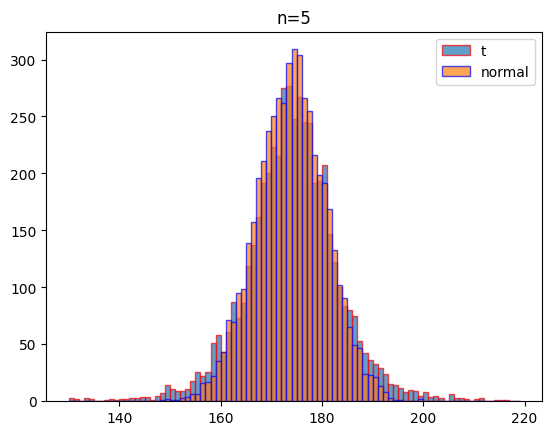

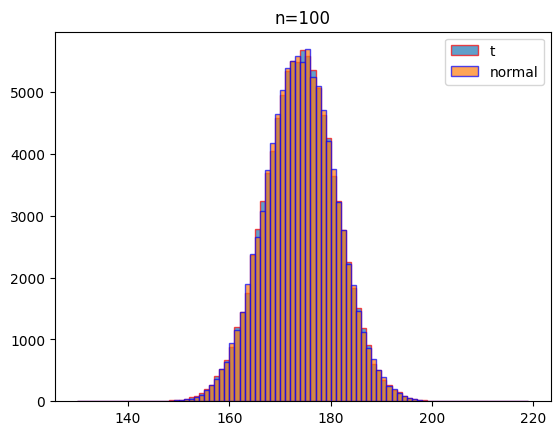

In [32]:
bins=range(130,220)
for n in [2,3,5,100]:
  ts = []
  ns = []
  for _ in range(1000):
    t_sample =  t.rvs(size=n,loc=174,scale=7,df=n-1)
    ts.extend(t_sample.tolist())
    n_sample =  norm.rvs(size=n,loc=174,scale=7)
    ns.extend(n_sample.tolist())
  plt.hist(ts,bins=bins,alpha=0.7,edgecolor='r',label='t')
  plt.hist(ns,bins=bins,alpha=0.7,edgecolor='b',label='normal')
  plt.legend()
  plt.title(f'n={n}')
  plt.show()

- t 확률 밀도 함수와 norm 확률 밀도 함수 도식화

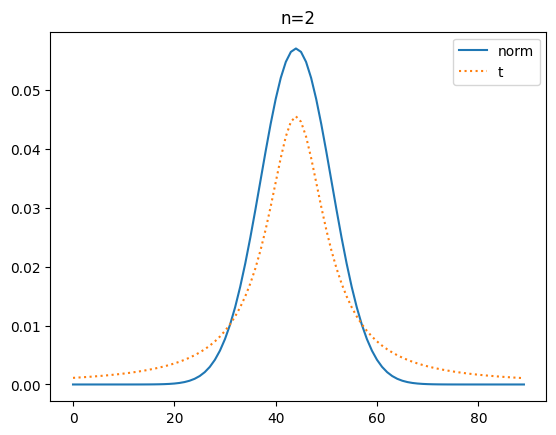

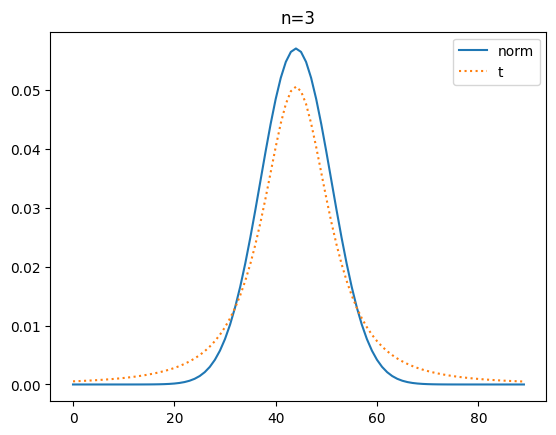

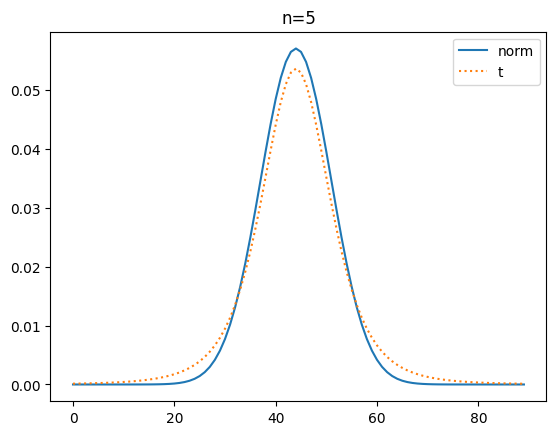

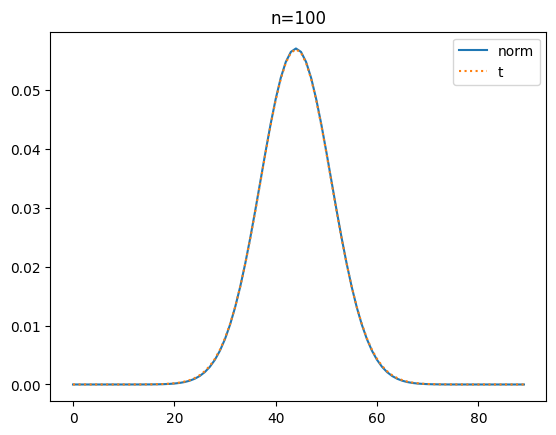

In [39]:
bins=range(130,220)
for n in [2,3,5,100]:
  ny = norm.pdf(bins,loc=174,scale=7)
  ty = t.pdf(bins,loc=174,scale=7,df=n-1)
  plt.plot(ny,label='norm')
  plt.plot(ty,':',label='t')
  plt.legend()
  plt.title(f'n={n}')
  plt.show()

- t분포에서 확률 관련 함수 사용하기

ㄱ시에 있는 8월에 온도를 계측한 결과 중 10개는 다음과 같습니다. (단위는 섭씨)

23, 30,18, 33, 28, 33, 34, 38, 29, 31

측정 온도가 25일 때 상위 몇%에 속할지 예측하시오.

In [65]:
data = np.array([23, 30,18, 33, 28, 33, 34, 38, 29, 31])
d_mean = data.mean()
d_std = data.std(ddof=1)
print("평균:",d_mean)
print("표준편차:",d_std)

평균: 29.7
표준편차: 5.735852159879995


In [66]:
print("자유도를 적용하지 않았을 때 표준편차:",data.std())

자유도를 적용하지 않았을 때 표준편차: 5.441507144165117


In [71]:
df = len(data)-1
score = 25
p = t.cdf(x=score,loc=d_mean,scale=d_std,df=df)
print(f"{score}는 상위 {(1-p)*100:.2f}%로 예측한다.")
p2 = t.sf(x=score,loc=d_mean,scale=d_std,df=df)
print(f"{score}는 상위 {p2*100:.2f}%로 예측한다.")

25는 상위 78.31%로 예측한다.
25는 상위 78.31%로 예측한다.


25점에서 35도 사이일 확률을 예측하시오.

In [70]:
low = 25
high = 35
lp = t.cdf(q=low,loc=d_mean,scale=d_std,df=df)
hp = t.cdf(x=high,loc=d_mean,scale=d_std,df=df)
print(f"[{low},{high}] 구간에 속할 확률은 {(hp-lp)*100:.2f}%로 예측한다.")

[25,35] 구간에 속할 확률은 59.33%로 예측한다.


상위 5%에 속하는 온도의 기준은 얼마 이상인지 예측하시오.

In [76]:
p = 1-0.05
temp = t.ppf(q=p,loc=d_mean,scale=d_std,df=df)
print(f"상위 {p*100}%에 속하는 온도의 기준은 {temp:.2f}이다.")

상위 95.0%에 속하는 온도의 기준은 40.21이다.
